## CHAPTER 3
---
# ENCODING CATEGORICAL VARIABLES

---
- **Categorical variables** are those values which are selected from a group of categories or labels. 
- **Ordinal categorical variables:** the labels have an intrinsic order
- **Nominal categorical variables:** the categories do not have an intrinsic order 
- The values of categorical variables are often encoded as strings. Scikit-learn does not support strings as values, therefore, we need to transform those strings into numbers. 
- The act of replacing strings with numbers is called **categorical encoding**. 
- In this chapter, we will discuss multiple categorical encoding techniques.

## 3.1 Credit approval data prep

**Credit Approval Dataset**: the _crx.data_ file was downloaded [here](http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/) and saved in *data* folder

In [1]:
import random
import pandas as pd
import numpy as np

In [2]:
# let's load the data
data = pd.read_csv('data/crx.data', header=None)

# create variable names according to UCI Machine Learning Repo information
varnames = ['A'+str(s) for s in range(1,17)]

# add column names
data.columns = varnames

# replace ? by np.nan
data = data.replace('?', np.nan)

# display the dataset
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
# re-cast some variables to the correct types 
data['A2'] = data['A2'].astype('float')
data['A14'] = data['A14'].astype('float')

# encode target to binary
data['A16'] = data['A16'].map({'+':1, '-':0})

# display
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [4]:
# find categorical variables
cat_cols = [c for c in data.columns if data[c].dtypes=='O']
data[cat_cols].head()

,A1,A4,A5,A6,A7,A9,A10,A12,A13
0,b,u,g,w,v,t,t,f,g
1,a,u,g,q,h,t,t,f,g
2,a,u,g,q,h,t,f,f,g
3,b,u,g,w,v,t,t,t,g
4,b,u,g,w,v,t,f,f,s


In [5]:
# find numerical variables
num_cols = [c for c in data.columns if data[c].dtypes!='O']
data[num_cols].head()

,A2,A3,A8,A11,A14,A15,A16
0,30.83,0.000,1.25,1,202.0,0,1
1,58.67,4.460,3.04,6,43.0,560,1
2,24.50,0.500,1.50,0,280.0,824,1
3,27.83,1.540,3.75,5,100.0,3,1
4,20.17,5.625,1.71,0,120.0,0,1


In [6]:
# fill in missing values
data[num_cols] = data[num_cols].fillna(0)
data[cat_cols] = data[cat_cols].fillna('Missing')

data.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [7]:
# save the data
path = 'data/credit_approval_uci_2.csv'
data.to_csv(path, index=False)

## 3.2 Creating binary variables through one-hot encoding

In [8]:
import pandas as pd

# to split the datasets
from sklearn.model_selection import train_test_split

# for one hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder

In [9]:
# let's load the data set
data = pd.read_csv(path)

data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [10]:
# make a list with the categorical variables
vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

# let's separate into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  
    data['A16'], 
    test_size=0.3,  
    random_state=0)  

X_train.shape, X_test.shape

((483, 15), (207, 15))

#### One Hot Encoding with Pandas

In [11]:
# let's inspect the unique values of A4
X_train['A4'].unique()

array(['u', 'y', 'Missing', 'l'], dtype=object)

In [12]:
# let's one hot encode A4
tmp = pd.get_dummies(X_train['A4'], drop_first=True)

tmp.head()

,l,u,y
596,0,1,0
303,0,1,0
204,0,0,1
351,0,0,1
118,0,1,0


In [13]:
# now let's encode all cateogrical variables together: train set
X_train_enc = pd.get_dummies(X_train[vars_categorical], drop_first=True)

X_train_enc.head()

,A1_a,A1_b,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
596,1,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,1,1,1,0,0
303,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
204,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
351,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
118,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,1,1,0,0


In [14]:
# and in the test set
X_test_enc = pd.get_dummies(X_test[vars_categorical], drop_first=True)

X_test_enc.head()

,A1_a,A1_b,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
14,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,1,1,0,0
586,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
140,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
492,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
350,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


The pandas' get_dummies() function ignores missing data, unless we specifically indicate otherwise, in which case, it will return missing data as an additional category: tmp = pd.get_dummies(X_train['A4'], drop_first=True, **dummy_na=True**). To encode the variable into k binaries, use instead drop_first=**False**.

#### One Hot Encoding with Scikit-learn

In [15]:
# we create and train the encoder
encoder = OneHotEncoder(categories='auto',
                        drop='first',  
                        sparse=False)

# fit the encoder to the train set
encoder.fit(X_train[vars_categorical])

# transform the train and test sets
X_train_enc = encoder.transform(X_train[vars_categorical])
X_test_enc = encoder.transform(X_test[vars_categorical])

# let's inspect the train set
pd.DataFrame(X_train_enc).head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [16]:
# let's inspect the test set
pd.DataFrame(X_test_enc).head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


- The beauty of pandas' get_dummies() function is that it returns feature names that clearly indicate which variable and which category each feature represents. On the downside, get_dummies() does not persist the information learned from the train set to the test set.
- Contrarily, scikit-learn's OneHotEncoder() function can persist the information from the train set, but it returns a NumPy array, where the information about the meaning of the features is lost.
- Scikit-learn's OneHotEncoder() function will create binary indicators from all variables in the dataset, so be mindful not to pass numerical variables when fitting or transforming your datasets.

## 3.3 Performing one-hot encoding of frequent categories

In [17]:
import pandas as pd
import numpy as np

# to split the datasets
from sklearn.model_selection import train_test_split

#### One Hot Encoding of top categories with Pandas

In [18]:
# let's inspect the unique categories of A6
X_train['A6'].unique()

array(['c', 'q', 'w', 'ff', 'm', 'i', 'e', 'cc', 'x', 'd', 'k', 'j',
       'Missing', 'aa', 'r'], dtype=object)

In [19]:
# let's find the top 5 most frequent categories in A6
X_train['A6'].value_counts().sort_values(ascending=False).head(5)

c    93
q    56
w    48
i    41
k    38
Name: A6, dtype: int64

In [20]:
# let's make a list with the most frequent categories in A6
top_5 = [
    x for x in X_train['A6'].value_counts().sort_values(
        ascending=False).head(5).index
]
top_5

['c', 'q', 'w', 'i', 'k']

In [21]:
# and now let's create 5 binary variables to encode A6
# in train and test sets

for label in top_5:
    X_train['A6' + '_' + label] = np.where(
        X_train['A6'] == label, 1, 0)
    
    X_test['A6' + '_' + label] = np.where(
        X_test['A6'] == label, 1, 0)
    
# let's visualise the result
X_train[['A6'] + ['A6'+'_'+c for c in top_5]].head(10)

,A6,A6_c,A6_q,A6_w,A6_i,A6_k
596,c,1,0,0,0,0
303,q,0,1,0,0,0
204,w,0,0,1,0,0
351,ff,0,0,0,0,0
118,m,0,0,0,0,0
247,q,0,1,0,0,0
652,i,0,0,0,1,0
513,e,0,0,0,0,0
230,cc,0,0,0,0,0
250,e,0,0,0,0,0


## 3.4 Replacing categories with ordinal numbers

Ordinal encoding consists of replacing the categories with digits from 1 to k (or 0 to k-1, depending on the implementation), where k is the number of distinct categories of the variable. The numbers are assigned arbitrarily. Ordinal encoding is better suited for non-linear machine learning models, which can navigate through the arbitrarily assigned digits to try and find patterns that relate to the target.

In [22]:
import pandas as pd

# to split the datasets
from sklearn.model_selection import train_test_split

# for integer encoding using sklearn
from sklearn.preprocessing import OrdinalEncoder

In [23]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


#### Ordinal encoding with Pandas

In [24]:
# let's create a dictionary with the mappings of categories to numbers for A7
ordinal_mapping = {k: i
                   for i, k in enumerate(X_train['A7'].unique(), 0)
                  }
ordinal_mapping

{'v': 0,
 'ff': 1,
 'h': 2,
 'dd': 3,
 'z': 4,
 'bb': 5,
 'j': 6,
 'Missing': 7,
 'n': 8,
 'o': 9}

In [25]:
# replace the labels with the integers
X_train['A7'] = X_train['A7'].map(ordinal_mapping)
X_test['A7'] = X_test['A7'].map(ordinal_mapping)

# let's explore the result
X_train['A7'].head(10)

596    0
303    0
204    0
351    1
118    0
247    2
652    0
513    3
230    0
250    4
Name: A7, dtype: int64

#### Putting the code in a function

In [26]:
# we can turn the previous commands into 2 functions
def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].unique(), 0)}

def integer_encode(train, test, variable, ordinal_mapping):
    X_train[variable] = X_train[variable].map(ordinal_mapping)
    X_test[variable] = X_test[variable].map(ordinal_mapping)
    
# and now we run a loop over the remaining categorical variables
# and encode them to numbers
for variable in vars_categorical:    
    if variable != 'A7':  # we encoded this one already        
        mappings = find_category_mappings(X_train, variable)        
        integer_encode(X_train, X_test, variable, mappings)
        
# let's inspect the results
X_train[vars_categorical].head()

,A1,A4,A5,A6,A7,A9,A10,A12,A13
596,0,0,0,0,0,0,0,0,0
303,0,0,0,1,0,1,1,1,0
204,1,1,1,2,0,0,0,1,0
351,1,1,1,3,1,1,1,1,0
118,1,0,0,4,0,0,0,0,0


#### Ordinal encoding with Scikit-learn

In [27]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  
    data['A16'],  
    test_size=0.3,  
    random_state=0)  

X_train.shape, X_test.shape

((483, 15), (207, 15))

In [28]:
# let's create an encoder
le = OrdinalEncoder()

# let's fit the encoder to the train set
le.fit(X_train[vars_categorical])

# we can see the unique classes
le.categories_

[array(['Missing', 'a', 'b'], dtype=object),
 array(['Missing', 'l', 'u', 'y'], dtype=object),
 array(['Missing', 'g', 'gg', 'p'], dtype=object),
 array(['Missing', 'aa', 'c', 'cc', 'd', 'e', 'ff', 'i', 'j', 'k', 'm',
        'q', 'r', 'w', 'x'], dtype=object),
 array(['Missing', 'bb', 'dd', 'ff', 'h', 'j', 'n', 'o', 'v', 'z'],
       dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['g', 'p', 's'], dtype=object)]

In [29]:
# let's transform train and test sets
X_train_enc = le.transform(X_train[vars_categorical])
X_test_enc = le.transform(X_test[vars_categorical])

#let's inspect the result
pd.DataFrame(X_train_enc, columns=vars_categorical).head()

,A1,A4,A5,A6,A7,A9,A10,A12,A13
0,1.0,2.0,1.0,2.0,8.0,1.0,1.0,1.0,0.0
1,1.0,2.0,1.0,11.0,8.0,0.0,0.0,0.0,0.0
2,2.0,3.0,3.0,13.0,8.0,1.0,1.0,0.0,0.0
3,2.0,3.0,3.0,6.0,3.0,0.0,0.0,0.0,0.0
4,2.0,2.0,1.0,10.0,8.0,1.0,1.0,1.0,0.0


## 3.5 Replacing categories with counts or frequency of observations

- In count or frequency encoding, we replace the categories with the count or the percentage of observations with that category. 
- That is, if 10 out of 100 observations show the category blue for the variable color, we would replace blue with 10 when doing count encoding, or by 0.1 if performing frequency encoding. 
- These techniques, which capture the representation of each label in a dataset, are very popular in data science competitions. 
- **The assumption is that the number of observations per category is somewhat predictive of the target**.
- Note that if two different categories are present in the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

In [30]:
import pandas as pd

# to split the datasets
from sklearn.model_selection import train_test_split

In [31]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [32]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  
    data['A16'],  
    test_size=0.3,  
    random_state=0)  

X_train.shape, X_test.shape

((483, 15), (207, 15))

#### Count encoding with Pandas

In [33]:
# let's obtain the counts for each category in the variable A7
count_map = X_train['A7'].value_counts().to_dict()
count_map

{'v': 277,
 'h': 101,
 'ff': 41,
 'bb': 39,
 'z': 7,
 'j': 5,
 'dd': 5,
 'Missing': 4,
 'n': 3,
 'o': 1}

In [34]:
# replace the labels with the counts
X_train['A7'] = X_train['A7'].map(count_map)
X_test['A7'] = X_test['A7'].map(count_map)

# let's explore the result
X_train['A7'].head(10)

596    277
303    277
204    277
351     41
118    277
247    101
652    277
513      5
230    277
250      7
Name: A7, dtype: int64

In [35]:
# we can calculate frequency
frequency_map = (X_train['A6'].value_counts() / len(X_train) ).to_dict()
frequency_map

{'c': 0.19254658385093168,
 'q': 0.11594202898550725,
 'w': 0.09937888198757763,
 'i': 0.08488612836438923,
 'ff': 0.07867494824016563,
 'k': 0.07867494824016563,
 'aa': 0.07039337474120083,
 'cc': 0.062111801242236024,
 'm': 0.053830227743271224,
 'x': 0.049689440993788817,
 'd': 0.043478260869565216,
 'e': 0.043478260869565216,
 'j': 0.016563146997929608,
 'Missing': 0.008281573498964804,
 'r': 0.002070393374741201}

In [36]:
# replace the labels with the frequency
X_train['A6'] = X_train['A6'].map(frequency_map)
X_test['A6'] = X_test['A6'].map(frequency_map)

X_train['A6'].head(10)

596    0.192547
303    0.115942
204    0.099379
351    0.078675
118    0.053830
247    0.115942
652    0.084886
513    0.043478
230    0.062112
250    0.043478
Name: A6, dtype: float64

#### Putting the process into 3 functions

In [37]:
def count_mappings(df, variable):
    return df[variable].value_counts().to_dict()

def frequency_mappings(df, variable):
    return (df[variable].value_counts() / len(df)).to_dict()

def encode(train, test, variable, mapping):
    X_train[variable] = X_train[variable].map(mapping)
    X_test[variable] = X_test[variable].map(mapping)
    
# make a list with the categorical variables
vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

# encode them with the functions above
for variable in vars_categorical:
    mappings = count_mappings(X_train, variable)
    encode(X_train, X_test, variable, mappings)
    
pd.DataFrame(X_train).head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,144,46.08,3.000,363,363,93,277,2.375,256,212,8,220,441,396.0,4159
303,144,15.92,2.875,363,363,56,277,0.085,227,271,0,263,441,120.0,0
204,335,36.33,2.125,115,115,48,277,0.085,256,212,1,263,441,50.0,1187
351,335,22.17,0.585,115,115,76,41,0.000,227,271,0,263,441,100.0,0
118,335,57.83,7.040,363,363,26,277,14.000,256,212,6,220,441,360.0,1332
247,144,19.67,0.210,363,363,56,101,0.290,256,212,11,263,441,80.0,99
652,144,22.50,0.415,363,363,41,277,0.335,227,271,0,220,38,144.0,0
513,335,20.25,9.960,363,363,42,10,0.000,256,271,0,263,441,0.0,0
230,335,25.17,3.500,363,363,30,277,0.625,256,212,7,263,441,0.0,7059
250,335,40.25,21.500,363,363,42,7,20.000,256,212,11,263,441,0.0,1200


## 3.6 Encoding with integers in an ordered manner

In the *Replacing categories with ordinal numbers* section (3.4), we replaced categories with integers, which were assigned arbitrarily. This encoding works well with non-linear machine learning algorithms that can navigate through the arbitrarily assigned digits to try and find patterns that relate them to the target. However, this encoding method may not work so
well with linear models.
We can instead assign integers to the categories given the target values. To do this, we do the following:
1. Calculate the mean value of the target per category.
2. Order the categories from the one with the lowest to the one with the highest target mean value.
3. Assign digits to the ordered categories, starting with 0 to the first category all of the way up to k-1 to the last category, where k is the number of distinct categories.

This encoding technique creates a monotonic relationship between the categorical variable and the response and therefore makes the variables more adequate for use in linear models.

In [38]:
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

In [39]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [40]:
# make a list with the categorical variables
vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data,  # all data
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 16), (207, 16))

#### Ordered integer encoding with Pandas

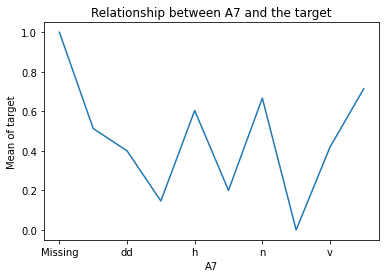

In [41]:
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

In [42]:
# let's order the labels in A7 according to the mean target value
X_train.groupby(['A7'])['A16'].mean().sort_values()

A7
o          0.000000
ff         0.146341
j          0.200000
dd         0.400000
v          0.418773
bb         0.512821
h          0.603960
n          0.666667
z          0.714286
Missing    1.000000
Name: A16, dtype: float64

In [43]:
# let's we generate an ordered list with the labels of A7
ordered_labels = X_train.groupby(['A7'])['A16'].mean().sort_values().index
ordered_labels

Index(['o', 'ff', 'j', 'dd', 'v', 'bb', 'h', 'n', 'z', 'Missing'], dtype='object', name='A7')

In [44]:
# next let's create a dictionary with the mappings of categories to numbers
ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}
ordinal_mapping

{'o': 0,
 'ff': 1,
 'j': 2,
 'dd': 3,
 'v': 4,
 'bb': 5,
 'h': 6,
 'n': 7,
 'z': 8,
 'Missing': 9}

[SettingWithCopyWarning](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)

In [45]:
pd.set_option('mode.chained_assignment', None) # added later

# replace the labels with the ordered numbers
X_train['A7'] = X_train['A7'].map(ordinal_mapping).copy()
X_test['A7'] = X_test['A7'].map(ordinal_mapping).copy()

# let's inspect the encoded variable
X_train['A7'].head()

596    4
303    4
204    4
351    1
118    4
Name: A7, dtype: int64

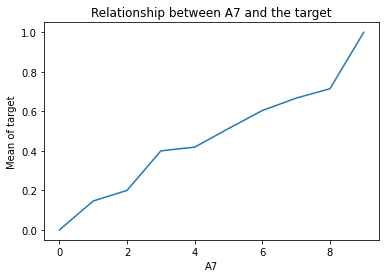

In [46]:
# let's explore the monotonic relationship
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

## 3.7 Encoding with the mean of the target

- Mean encoding or target encoding implies replacing the categories with the average target value for that category. 
- For example, if we have a City variable, with the categories of London, Manchester, and Bristol, and we want to predict the default rate; if the default rate for London is 30%, we replace London with 0.3; if the default rate for Manchester is 20%, we replace Manchester with 0.2; and so on. 
- The same can be done with a continuous target.
- As with any machine learning algorithm, the parameters for target encoding, that is, the mean target value per category, need to be learned from the train set only and used to replace categories in the train and test sets.

In [47]:
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

In [48]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [49]:
# make a list with the categorical variables
vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data,  # all data
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 16), (207, 16))

#### Target mean encoding with Pandas

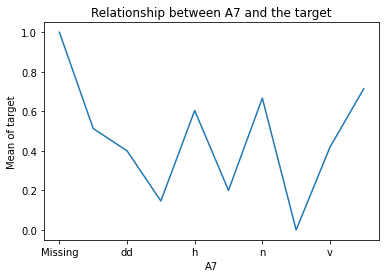

In [50]:
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

In [51]:
# let's create a dictionary with the target mean per category for the variable A7
ordered_labels = X_train.groupby(['A7'])['A16'].mean().to_dict()
ordered_labels

{'Missing': 1.0,
 'bb': 0.5128205128205128,
 'dd': 0.4,
 'ff': 0.14634146341463414,
 'h': 0.6039603960396039,
 'j': 0.2,
 'n': 0.6666666666666666,
 'o': 0.0,
 'v': 0.4187725631768953,
 'z': 0.7142857142857143}

In [52]:
# replace the labels with the target mean
X_train['A7'] = X_train['A7'].map(ordered_labels)
X_test['A7'] = X_test['A7'].map(ordered_labels)

# let's inspect the result
X_train['A7'].head()

596    0.418773
303    0.418773
204    0.418773
351    0.146341
118    0.418773
Name: A7, dtype: float64

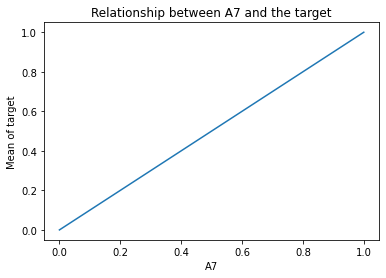

In [53]:
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

## 3.8 Grouping rare or infrequent categories

- Rare values are those categories that are present only in a small percentage of the observations. 
- There is no rule of thumb to determine how small is a small percentage, but typically, any value below 5 % can be considered rare. 
- Infrequent labels often appear only on the train set or only on the test set, therefore making the algorithms prone to overfitting or unable to score an observation. 
- To avoid these complications, we can group infrequent categories into a new category called Rare or Other.

In [54]:
import numpy as np
import pandas as pd

# to split the datasets
from sklearn.model_selection import train_test_split

In [55]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [56]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data,  # all data
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 16), (207, 16))

#### Count encoding with Pandas

In [57]:
# let's inspect the frequency of labels in A7
X_train['A7'].value_counts() / len(X_train)

v          0.573499
h          0.209110
ff         0.084886
bb         0.080745
z          0.014493
j          0.010352
dd         0.010352
Missing    0.008282
n          0.006211
o          0.002070
Name: A7, dtype: float64

In [58]:
def find_frequent_labels(df, variable, tolerance):    
    temp = df[variable].value_counts()  / len(df)    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]    
    return non_rare

# frequent categories in A7
frequent_cat = find_frequent_labels(X_train, 'A7', 0.05)
frequent_cat

['v', 'h', 'ff', 'bb']

In [59]:
# rare categories in A7
[x for x in X_train['A7'].unique() if x not in frequent_cat]

['dd', 'z', 'j', 'Missing', 'n', 'o']

In [60]:
# let's group rare labels into a new category called rare
X_train['A7'] = np.where(X_train['A7'].isin(frequent_cat), X_train['A7'], 'Rare')    
X_test['A7'] = np.where(X_test['A7'].isin(frequent_cat), X_test['A7'], 'Rare')

# let's inspect the results
X_train['A7'].value_counts() / len(X_train)

v       0.573499
h       0.209110
ff      0.084886
bb      0.080745
Rare    0.051760
Name: A7, dtype: float64